In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import wwdata as ww

note to self: DO is al upgeload tot en met september

In [22]:
#this is a script to nicely save the raw data after extraction from the pileaute database

filepath1='data/sensor_data/basins/Pilote reactor 4 Temperature (Celsius) -data-2024-09-24 09_47_24.csv'
filepath2='data/sensor_data/processed_dataframes/temp_basin5.csv'

df1 = pd.read_csv(filepath1,index_col=0)
df2 = pd.read_csv(filepath2,index_col=0)

df1.rename(columns={'19 - Temperature': 'temp_basin5'}, inplace=True)
df1=df1.rename_axis('Time') #rename index column
# df2.rename(columns={'12- TSS': 'TSS_RAS'}, inplace=True)

df_concat=df2
df_concat=pd.concat([df2, df1], ignore_index=False)
df_concat.index = pd.to_datetime(df_concat.index)

#delete duplicates and sort indices
df_cleaned = df_concat[~df_concat.index.duplicated(keep='first')]
df_cleaned = df_cleaned.sort_values(by='Time')

# #save dataframe as new csv file
df_cleaned.to_csv('data/sensor_data/processed_dataframes/temp_basin5.csv', sep=',', index=True)

df_cleaned


,temp_basin5
Time,
2023-10-01 00:00:34,19.0
2023-10-01 00:01:34,19.0
2023-10-01 00:02:34,19.0
2023-10-01 00:03:34,19.0
2023-10-01 00:04:34,19.0
...,...
2024-09-24 09:35:30,24.6
2024-09-24 09:36:30,24.6
2024-09-24 09:37:30,24.6


In [2]:
# Directory containing the CSV files
directory = 'data/sensor_data/processed_dataframes'

# Initialize a list to hold DataFrames and their names
dataframes_resampled = []
dataframes_original = []

# Read and process each CSV file
for filename in os.listdir(directory):
    # Generate the name for the DataFrame
    df_name = os.path.splitext(filename)[0]   
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory, filename))
        
    # Set the first column as the index
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])
    df.set_index(df.columns[0], inplace=True)

    # If there is multiple identical indices, mean will be taken
    df = df.groupby(df.index).mean()
    
    # Resample to 5 min intervals
    df_resampled = df.resample('5T').ffill()

    # Store the DataFrame and its name
    dataframes_resampled.append((df_name, df_resampled))
    dataframes_original.append((df_name, df))

In [3]:
dataframes_original

[('airflow_basin3',
                       airflow_basin3
  Time                               
  2023-10-01 00:00:34           269.0
  2023-10-01 00:01:34           267.0
  2023-10-01 00:02:34           268.0
  2023-10-01 00:03:34           268.0
  2023-10-01 00:04:34           269.0
  ...                             ...
  2024-05-26 23:55:10             0.0
  2024-05-26 23:56:10             0.0
  2024-05-26 23:57:10             0.0
  2024-05-26 23:58:10             0.0
  2024-05-26 23:59:10             0.0
  
  [340287 rows x 1 columns]),
 ('airflow_basin4',
                       airflow_basin4
  Time                               
  2023-10-01 00:00:34           269.0
  2023-10-01 00:01:34           267.0
  2023-10-01 00:02:34           268.0
  2023-10-01 00:03:34           268.0
  2023-10-01 00:04:34           269.0
  ...                             ...
  2024-05-26 23:55:10           190.0
  2024-05-26 23:56:10           190.0
  2024-05-26 23:57:10           189.0
  2024-05-26 23

: 

C:\Users\lover37\AppData\Local\Temp\ipykernel_10968\3748943446.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\lover37\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


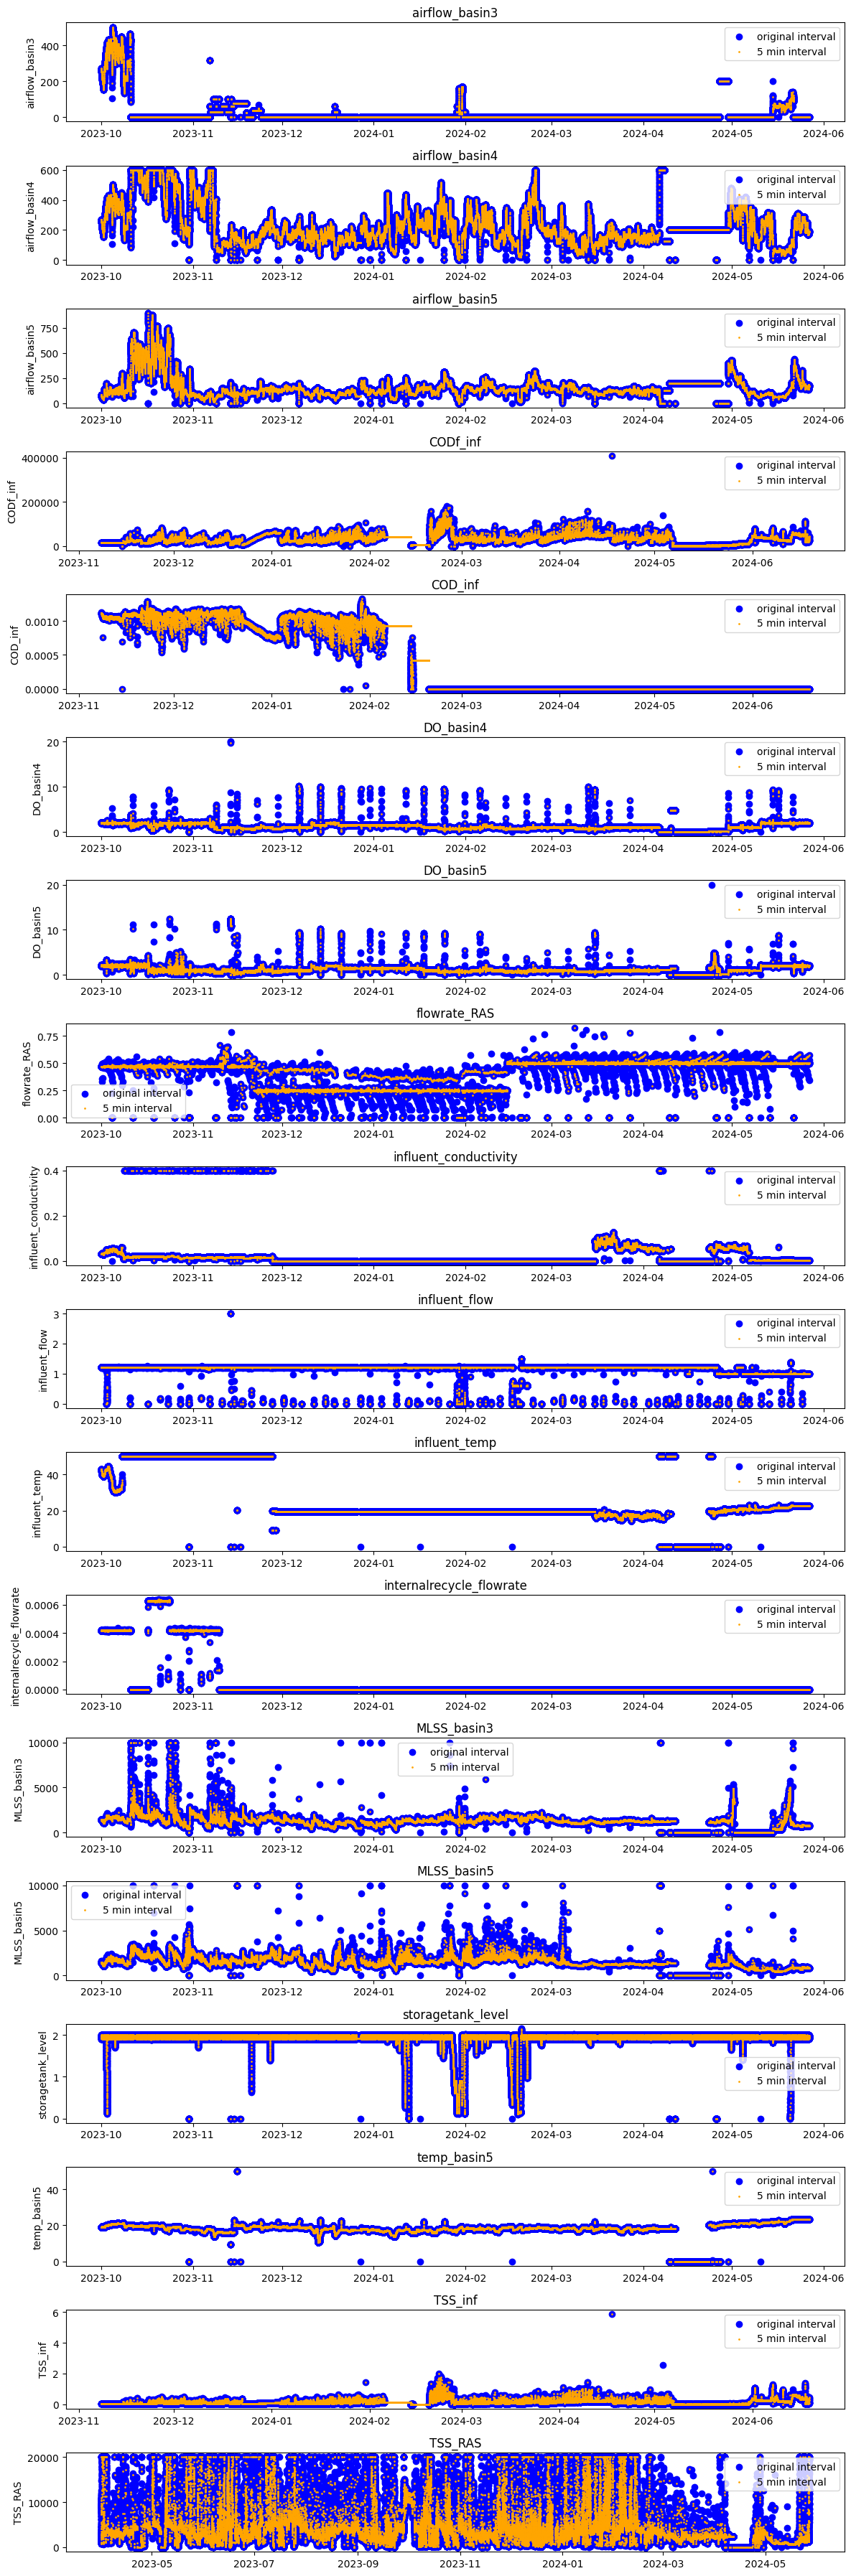

In [4]:
# Create a figure with subplots
num_files = len(dataframes_original)

fig, axes = plt.subplots(num_files, 1, figsize=(12, 2 * num_files))
# Plot each DataFrame in a separate subplot
for i, (df_name, df) in enumerate(dataframes_original):

    # Plot the filtered DataFrame
    axes[i].scatter(dataframes_original[i][1].index, dataframes_original[i][1], label='original interval', color='blue')
    axes[i].scatter(dataframes_resampled[i][1].index, dataframes_resampled[i][1], label='5 min interval', color='orange', s=1)

    axes[i].set_title(df_name)
    axes[i].set_ylabel(df_name)
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
# Initialize a DataFrame using the first DataFrame's index
combined_df = dataframes_resampled[0][1]

# Iterate over the rest of the DataFrames and join them on the index
for df_name, df in dataframes_resampled[1:]:
    combined_df = combined_df.join(df, how='outer')

#combined_df
start_date = '2023-10-01'
combined_df = combined_df[combined_df.index >= start_date]

In [36]:
# fig, axes = plt.subplots(nrows=combined_df.shape[1], ncols=1, figsize=(12, 2 * combined_df.shape[1]), sharex=True)

# # Plot each variable in a separate subplot
# for i, column in enumerate(combined_df.columns):
#     axes[i].scatter(combined_df.index, combined_df[column], s=2)
#     axes[i].set_ylabel(column)  # Set y-label for each subplot

# # Set the common xlabel
# axes[-1].set_xlabel('Date')

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [47]:
dataset = ww.OnlineSensorBased(data=combined_df,
                               data_type='WWTP')
#dataset.data

data filtering: 
* filtering NaN
* filtering physically impossible values
* filtering constant values (=sensor failure)
* filtering based on difference between two consecutive points
* filtering based on smoothness

64161 values detected and tagged as filtered by function double value tagging
14.936296021318626% datapoints are left over from the original 75427.0
20876 values detected and tagged as filtered by function double value tagging
72.32290824240657% datapoints are left over from the original 75427.0
17998 values detected and tagged as filtered by function double value tagging
76.13851803730759% datapoints are left over from the original 75427.0
5113 values detected and tagged as filtered by function double value tagging
93.22126029140759% datapoints are left over from the original 75427.0
39462 values detected and tagged as filtered by function double value tagging
47.68186458430005% datapoints are left over from the original 75427.0
12158 values detected and tagged as filtered by function double value tagging
83.88110358359738% datapoints are left over from the original 75427.0
8857 values detected and tagged as filtered by function double value tagging
88.25752051652591% datapoints are l

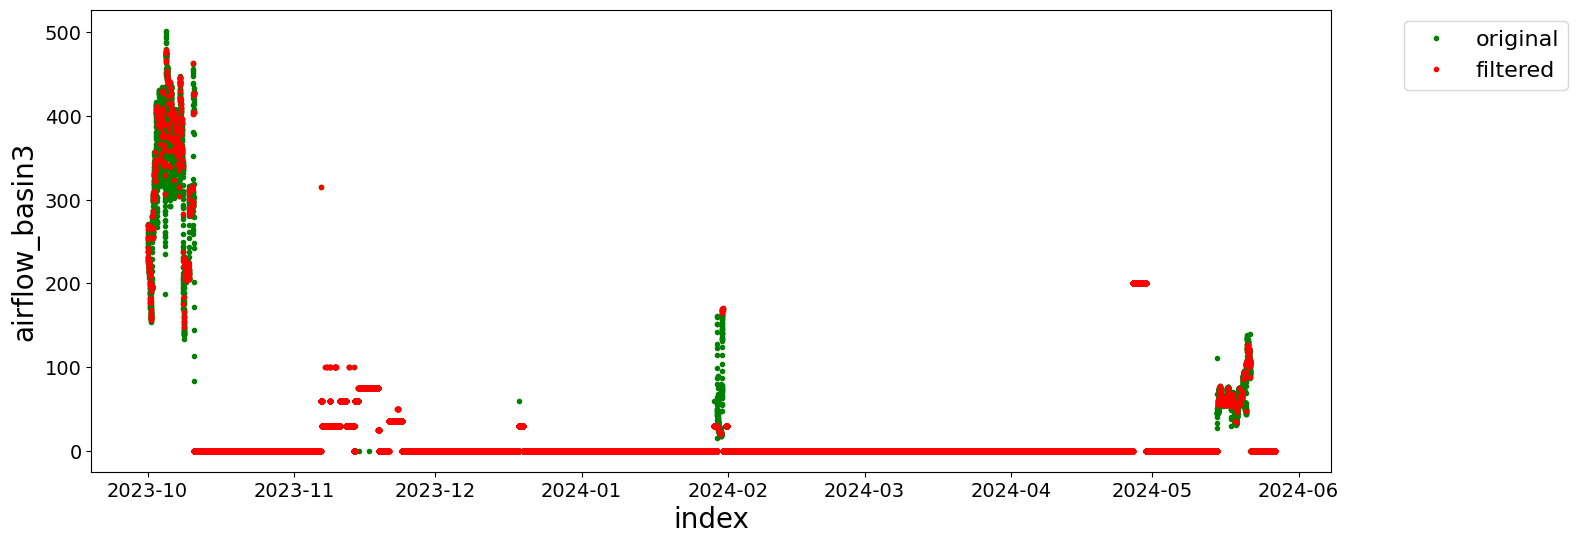

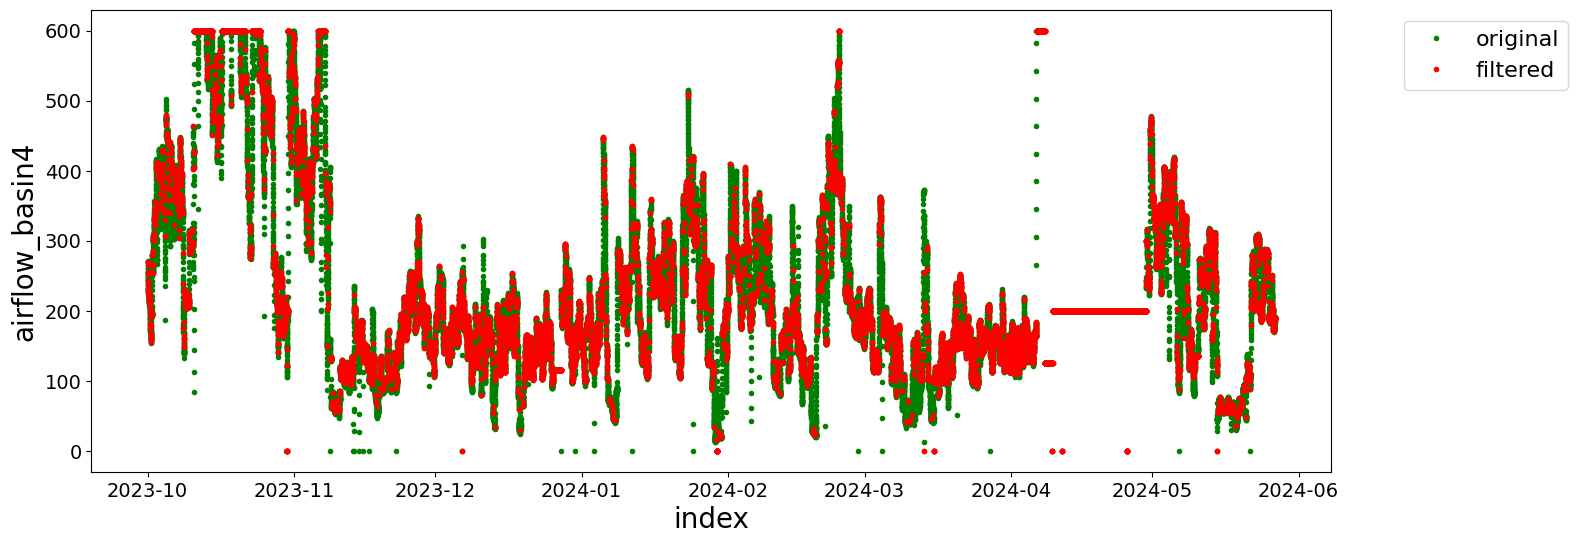

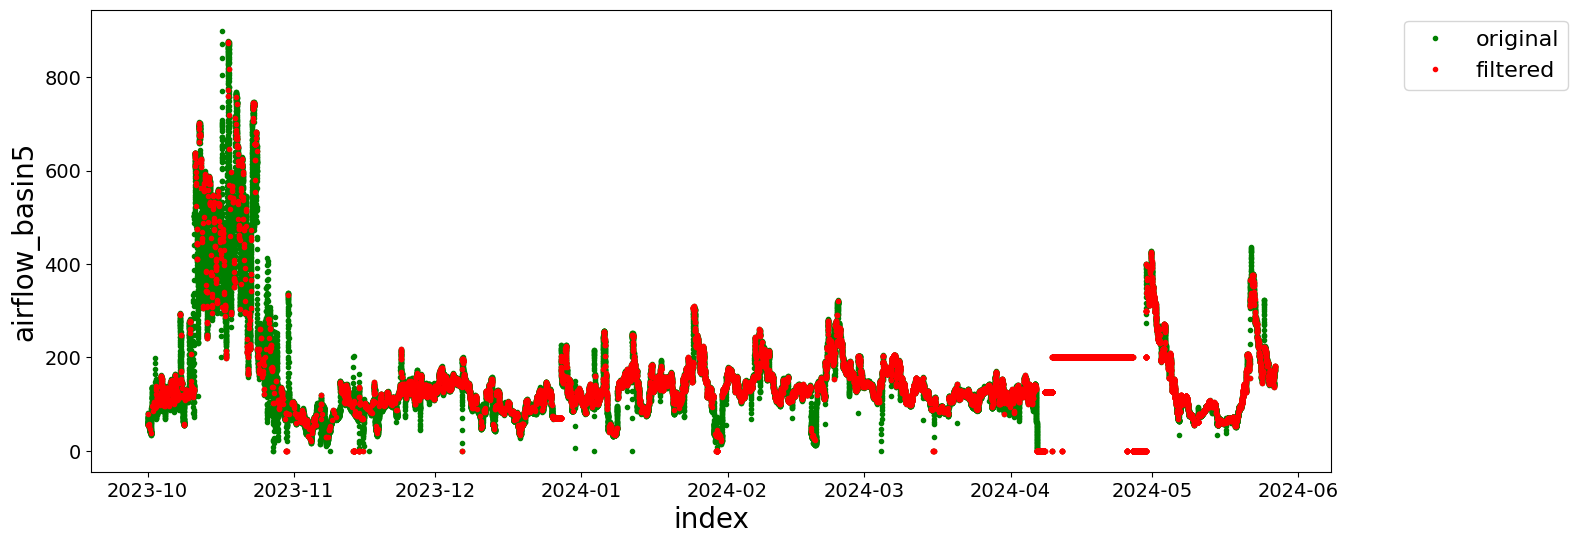

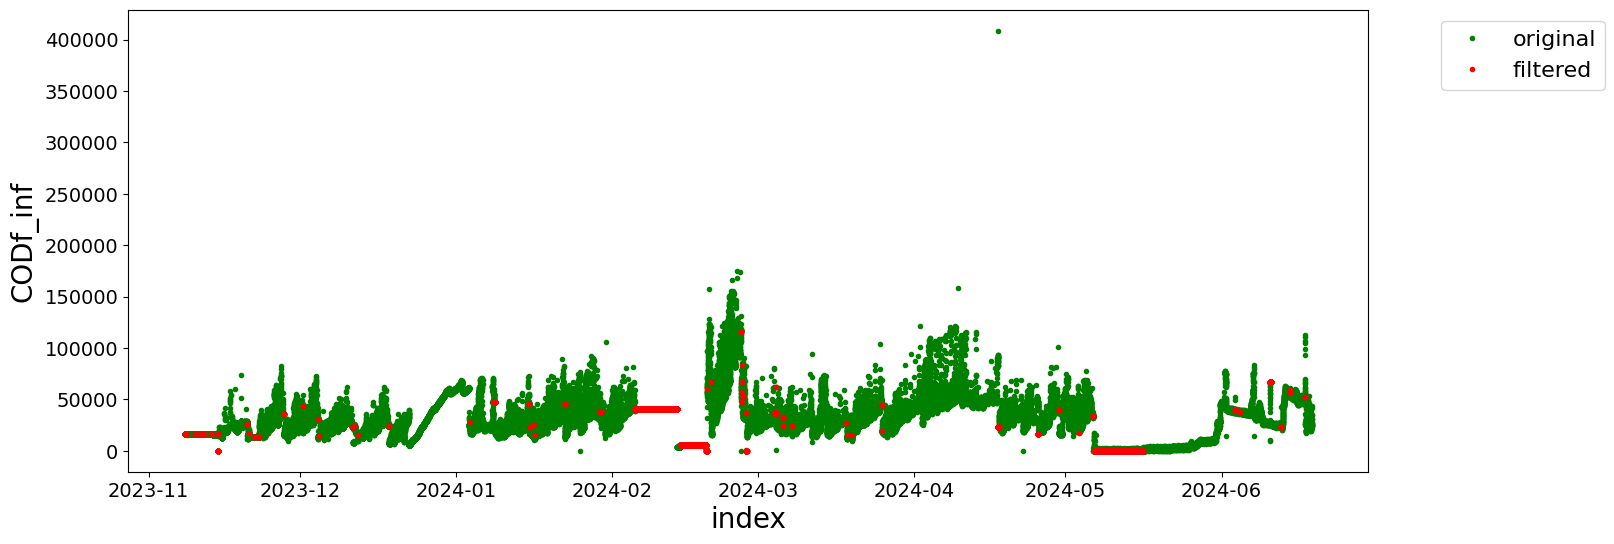

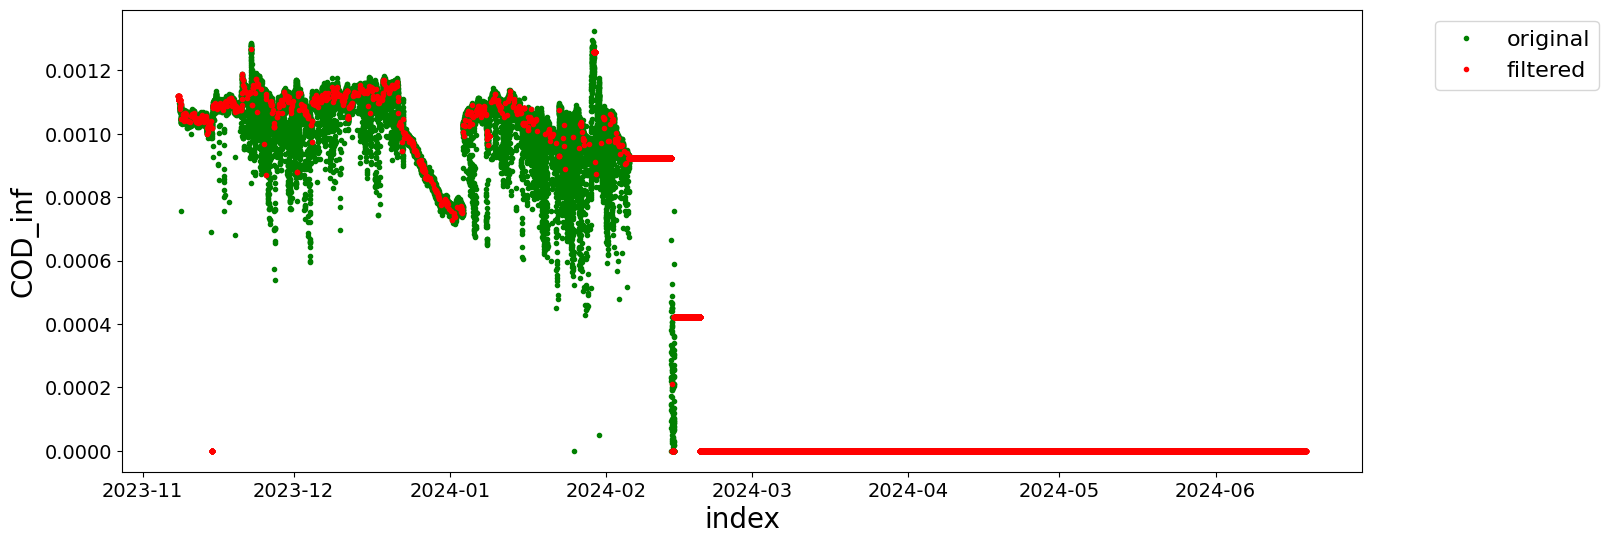

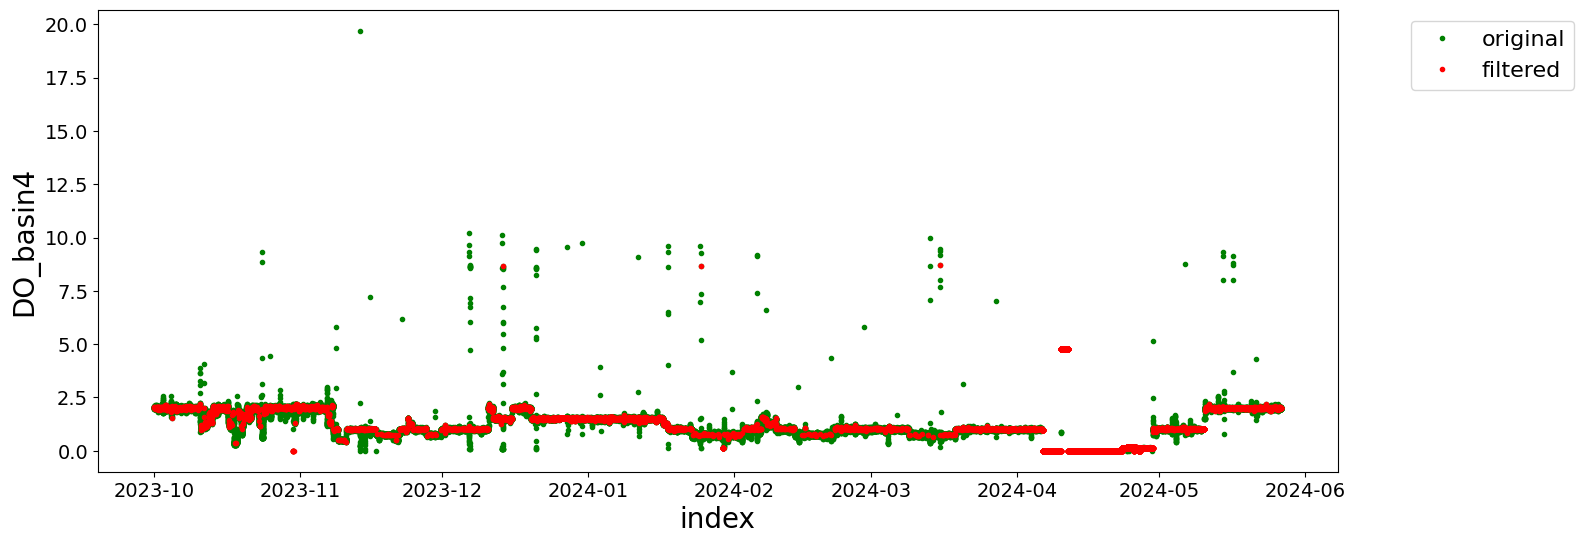

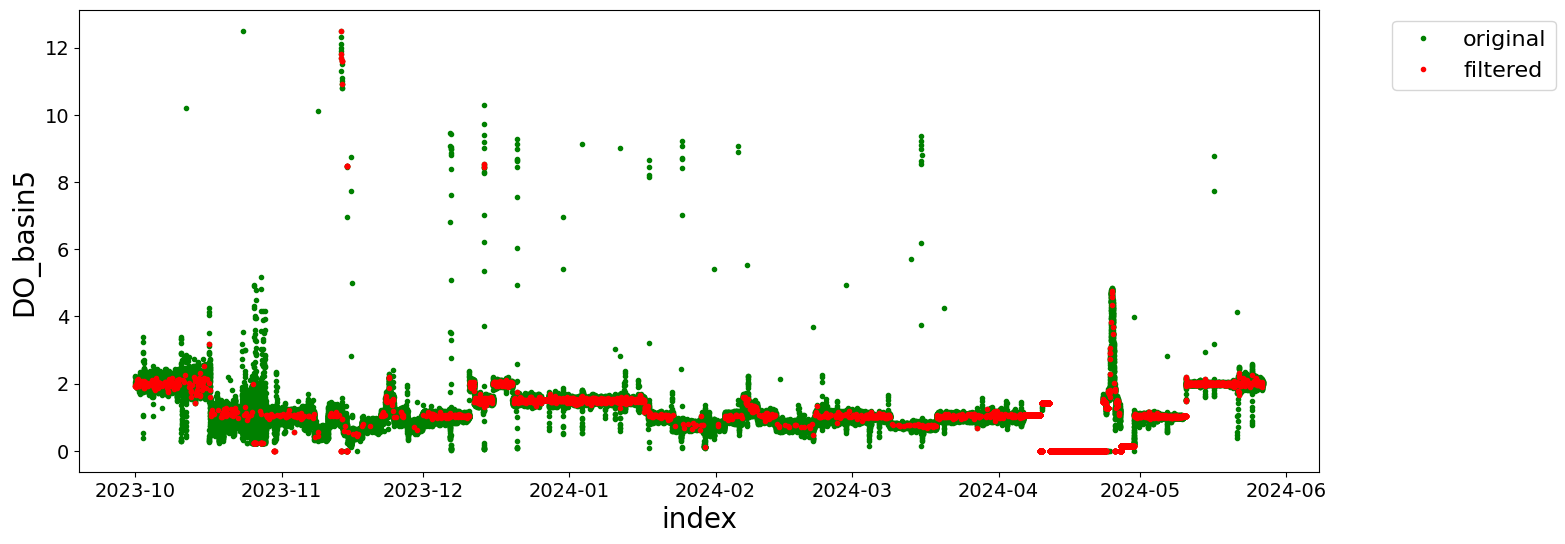

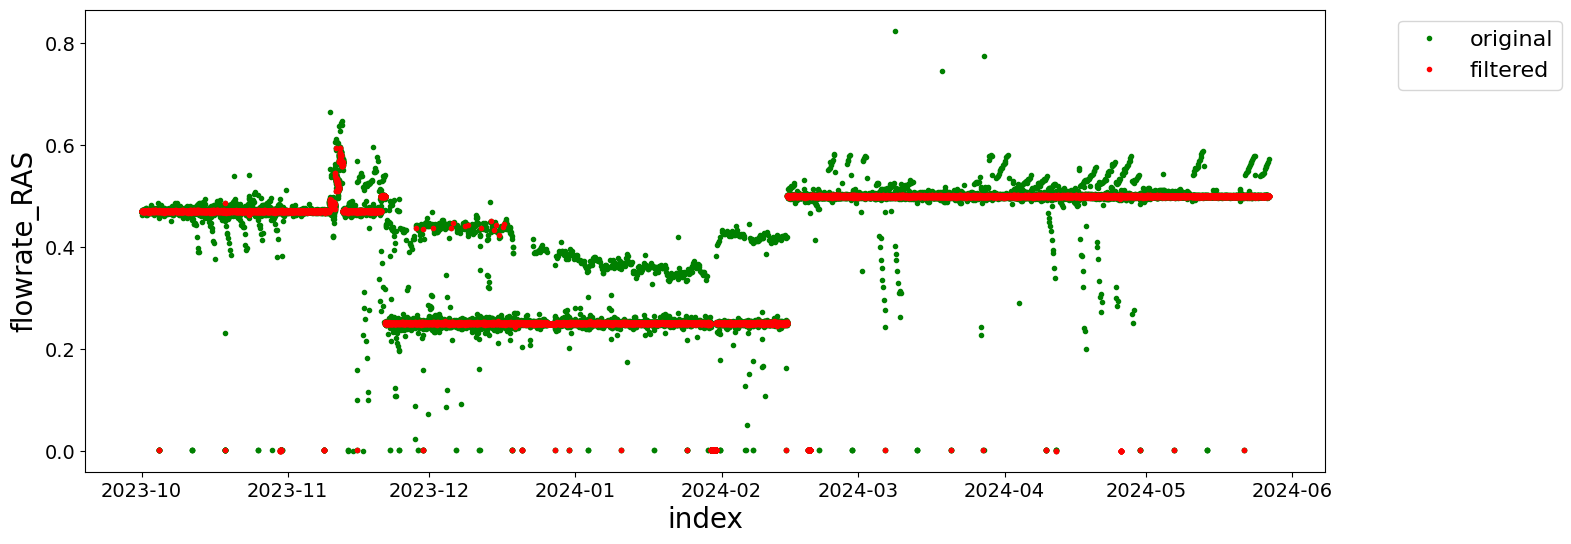

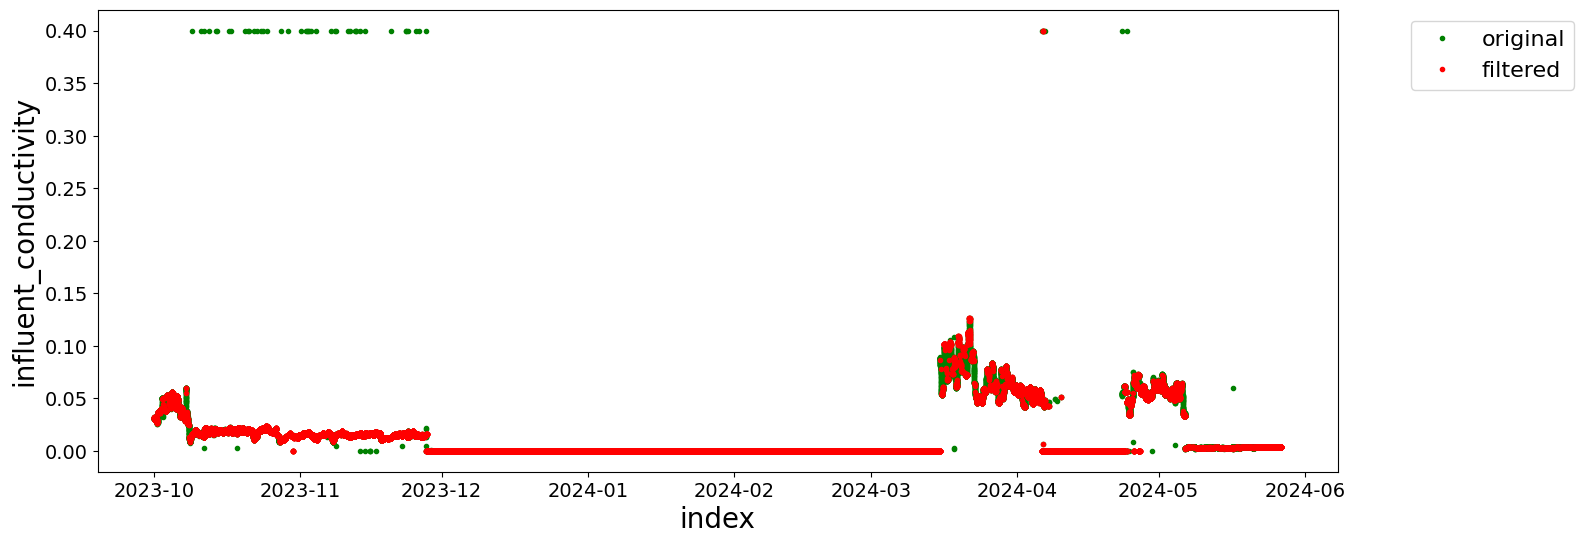

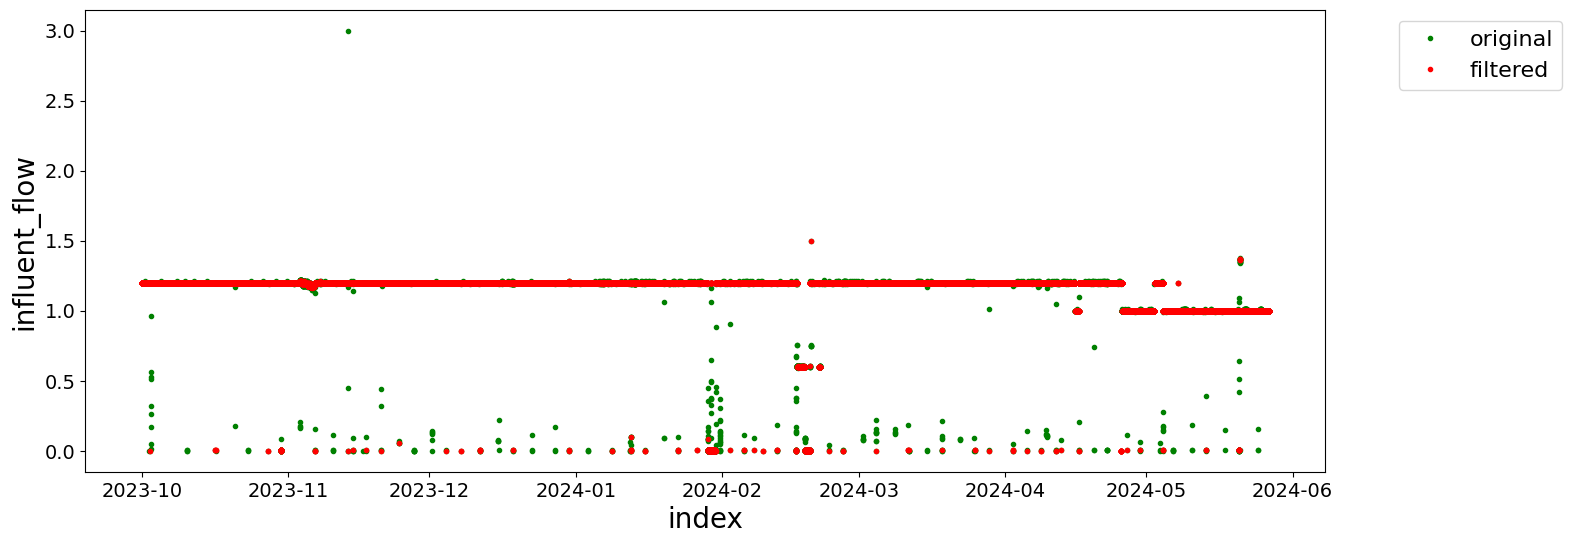

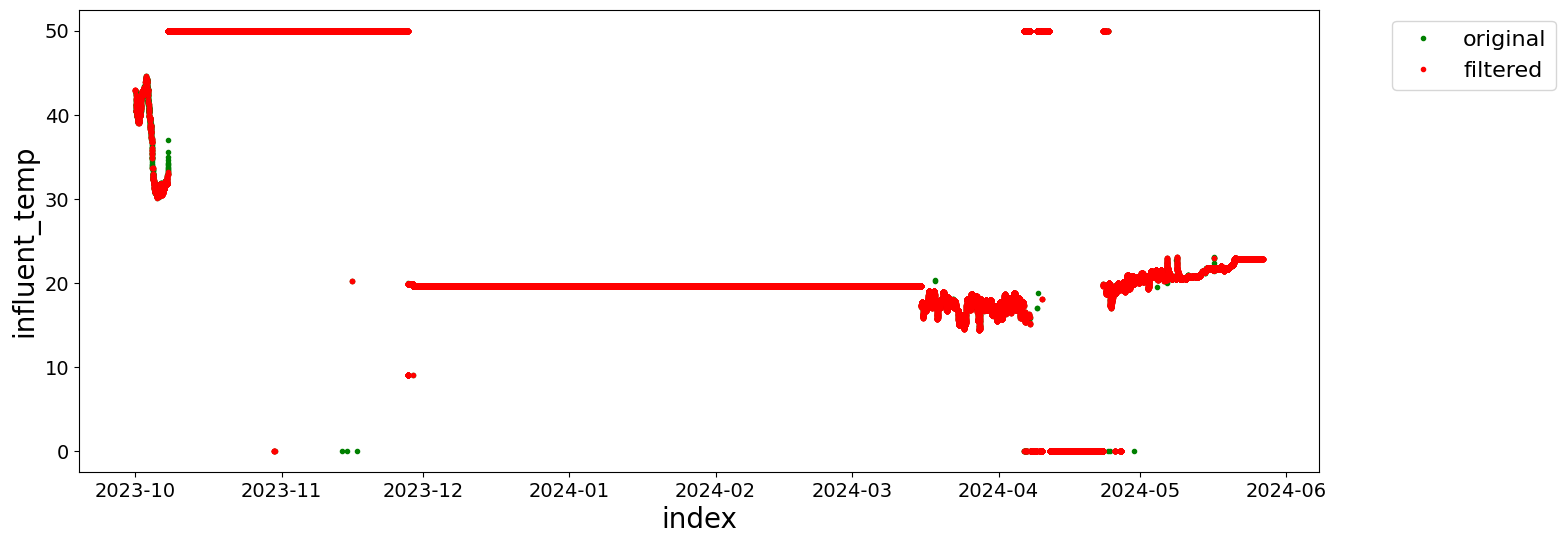

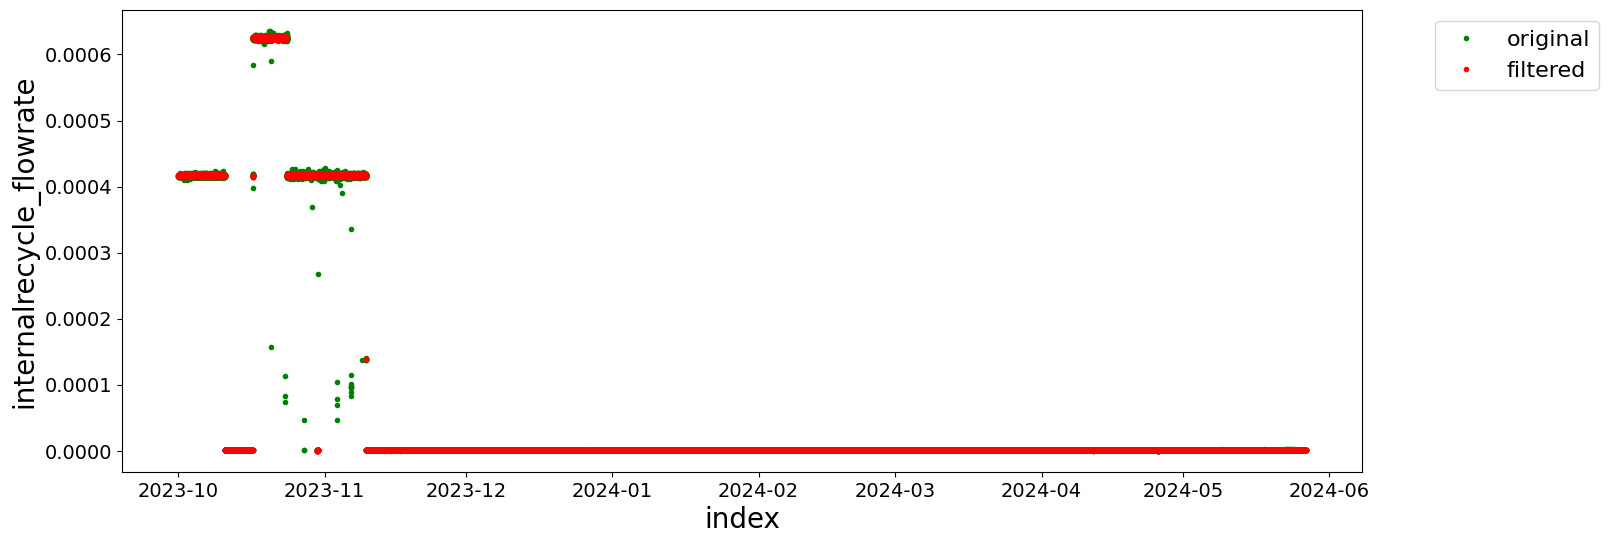

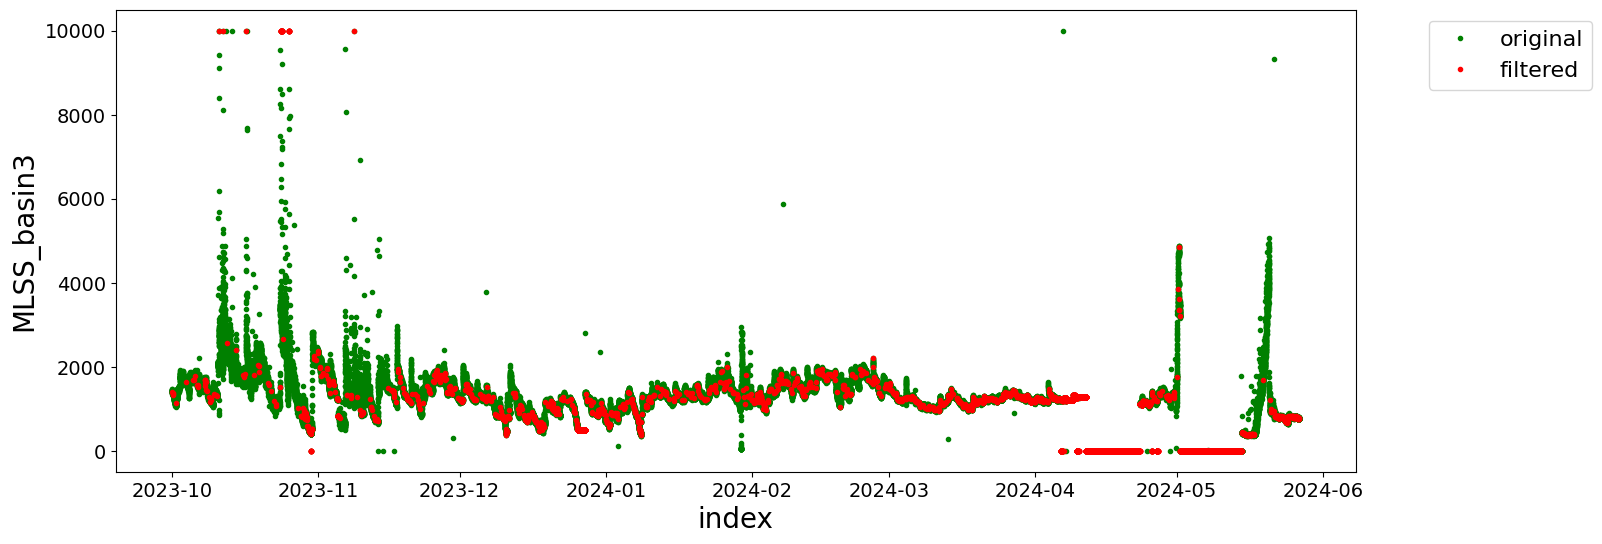

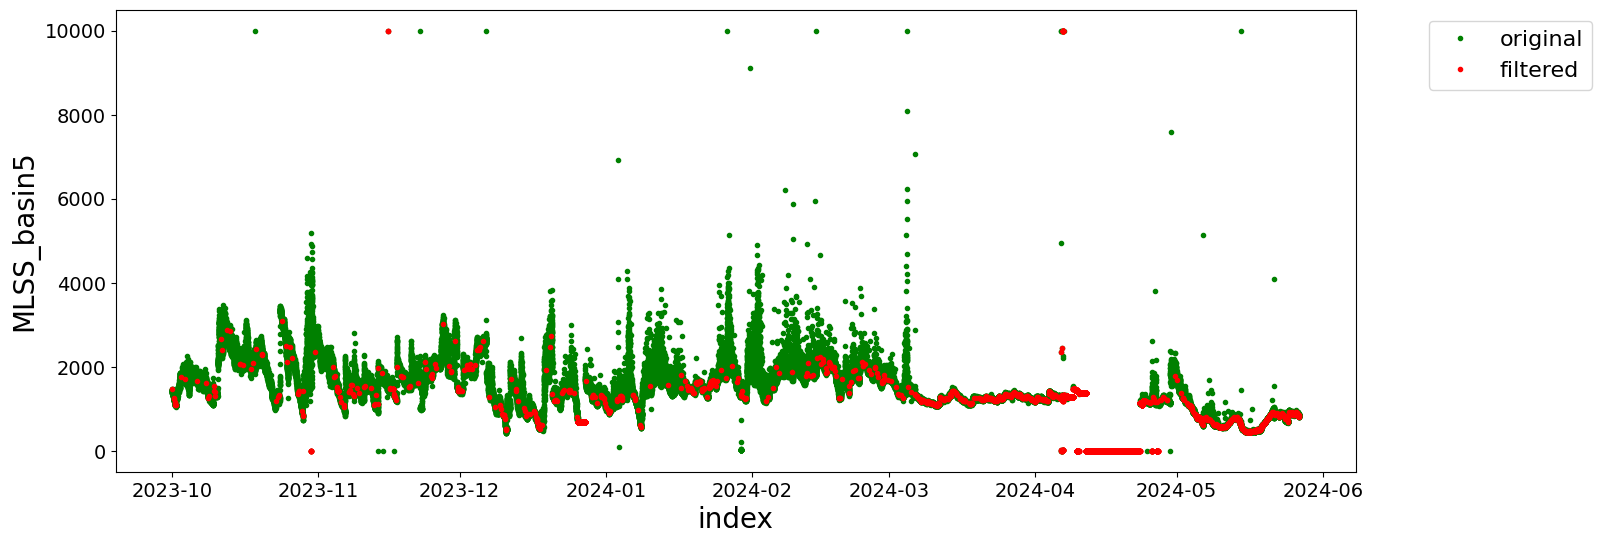

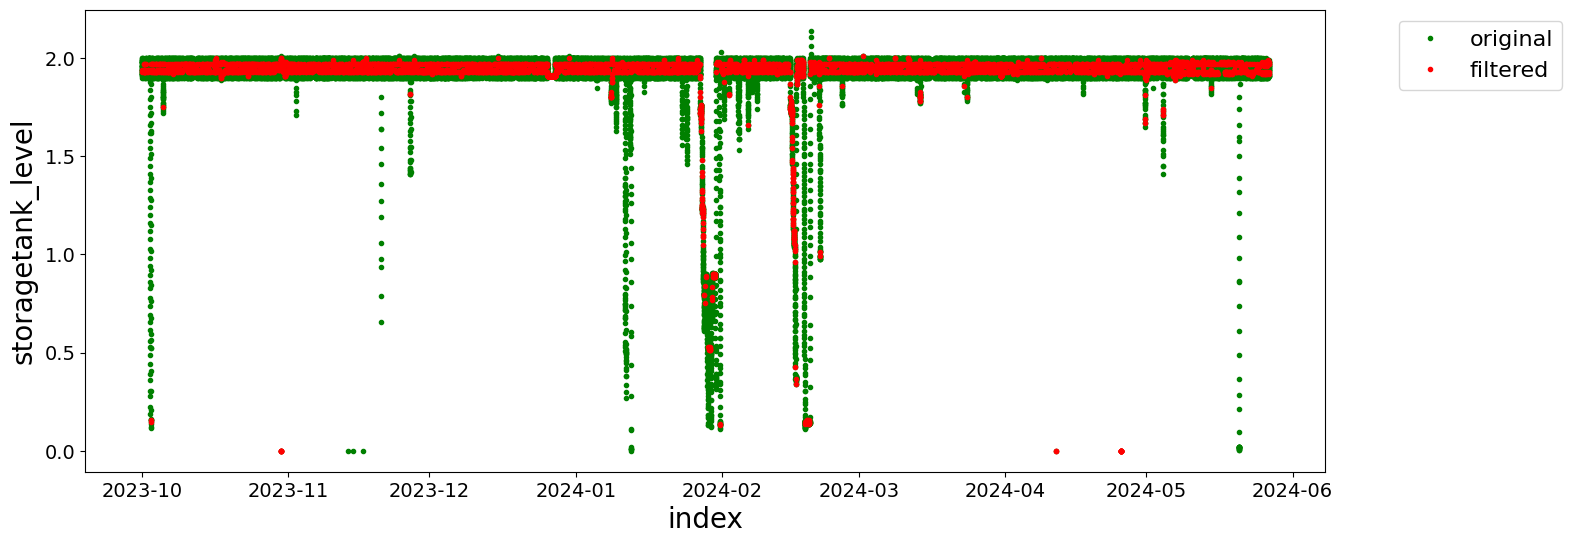

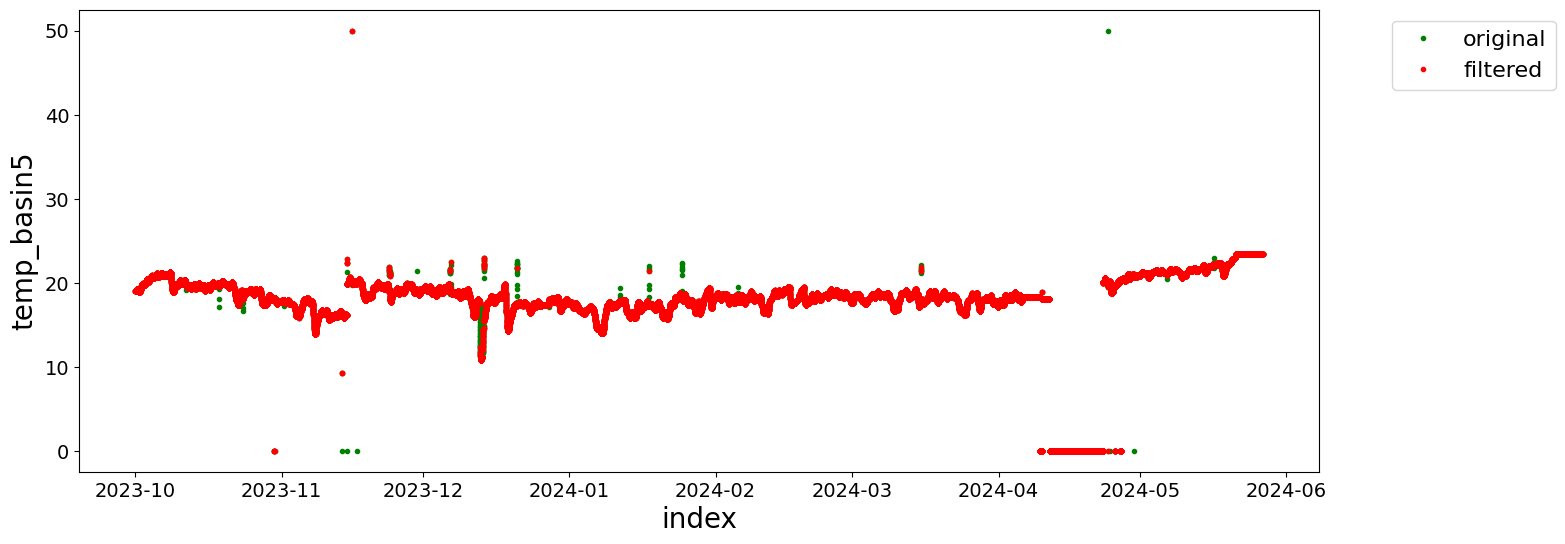

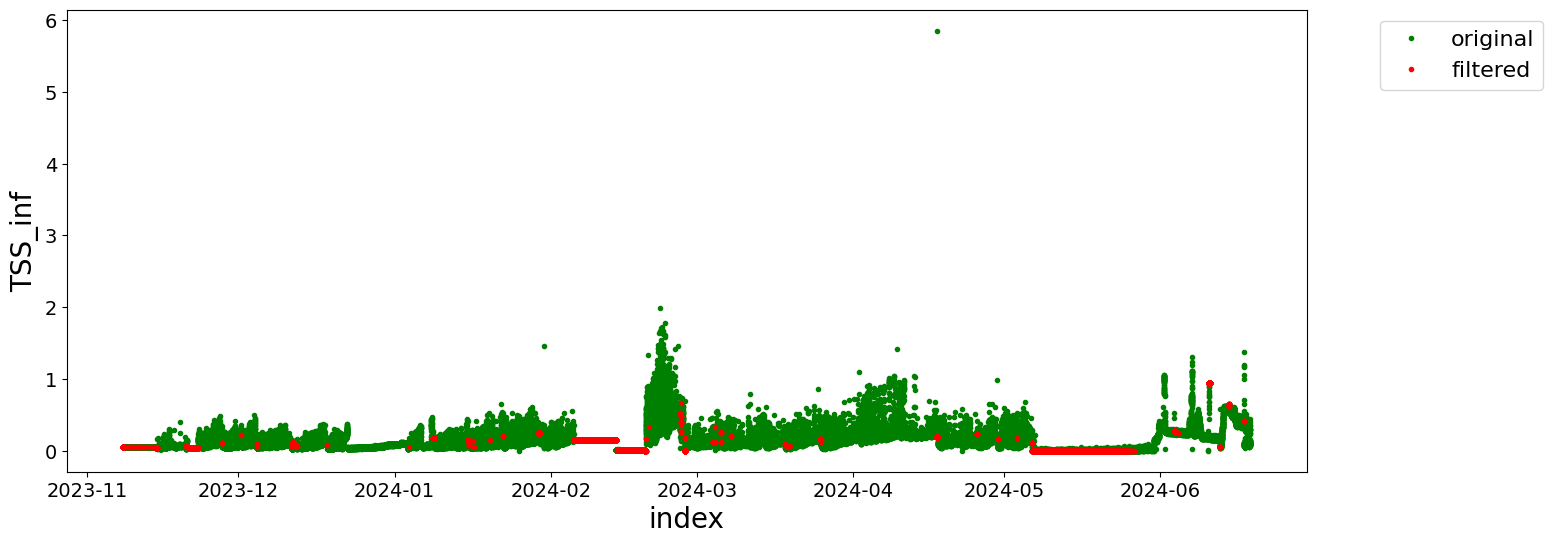

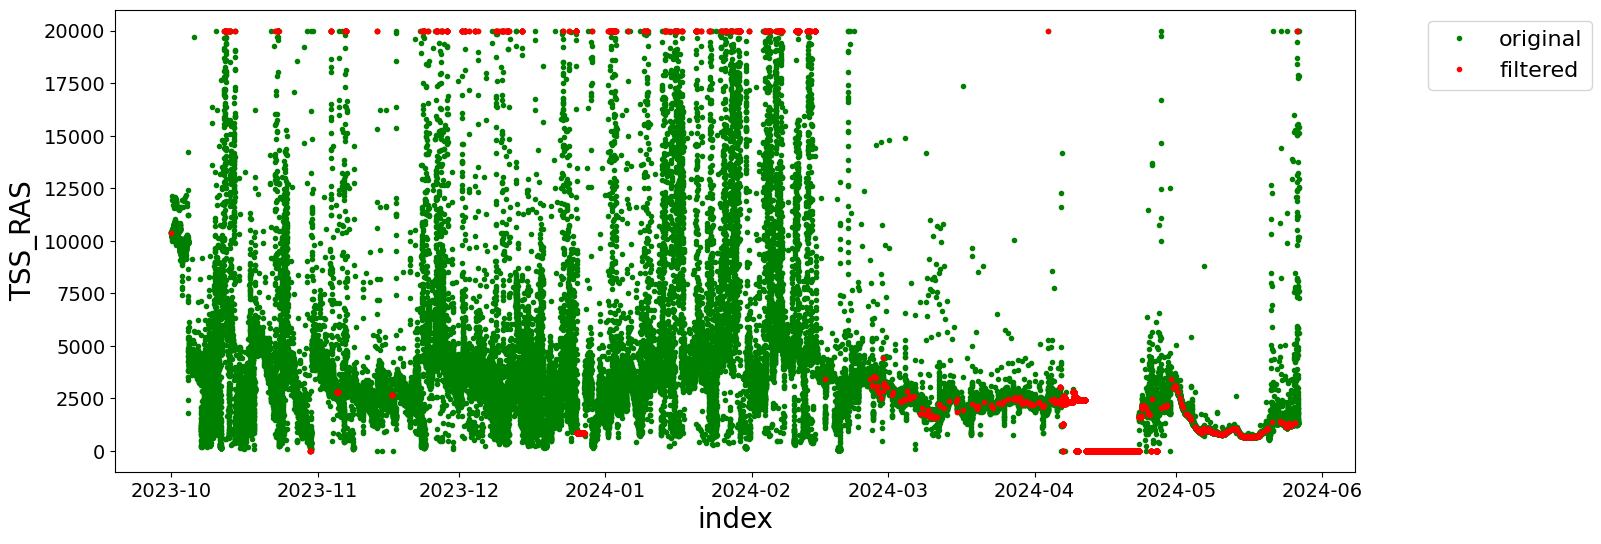

In [48]:
# # filter nan
# for column in combined_df:
#     print(column)
#     dataset.tag_nan(column)

# # filter physically impossible values
# for column in combined_df:
#     dataset.tag_extremes(column, limit=0, method='below', clear=False, plot=True)
# dataset.tag_extremes('influent_temp', limit=30, method='above', clear=False, plot=True)
# dataset.tag_extremes('temp_basin5', limit=30, method='above', clear=False, plot=True)

# filtering constant values (=sensor failure)
# I need to check for which variables this is possible and for which not
# for column in combined_df:
#     dataset.tag_doubles(column, 0.0000000005, arange=['2023/10/1','2024/6/24'], plot=True, final=False)

# filtering based on difference between two consecutive points

# filtering based on smoothness